# Image denoising

### Singular Value Decomposition (SVD)

In [1]:
import numpy as np
from scipy.stats import bernoulli
from utils import *

import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from PIL import Image
import cv2

**Load image**

In [2]:
img = Image.open('cameraman.png').convert('L')
img = np.asarray(img)/255.

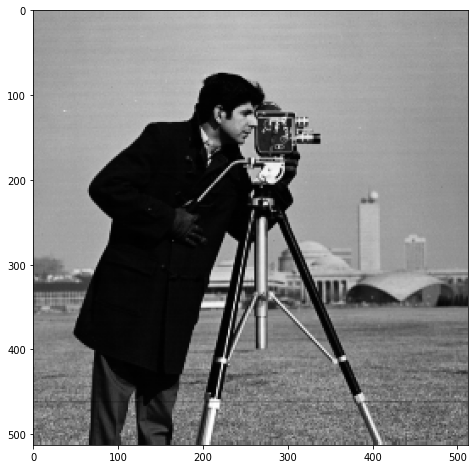

In [3]:
fig = plt.figure(figsize=[8,8])
plt.imshow(img, cmap='gray')
plt.show()

**Add noise**

In [4]:
def gen_mask(m, n, prob_masked=0.5):
    """
    Generate a binary mask for m x n matrix.
    Note that 1 denotes observed, and 0 denotes unobserved.
    """
    return 1 - bernoulli.rvs(p=prob_masked, size=(m, n))

In [5]:
m, n = img.shape
mask = gen_mask(m, n, 0.2)
img_noisy = img*mask

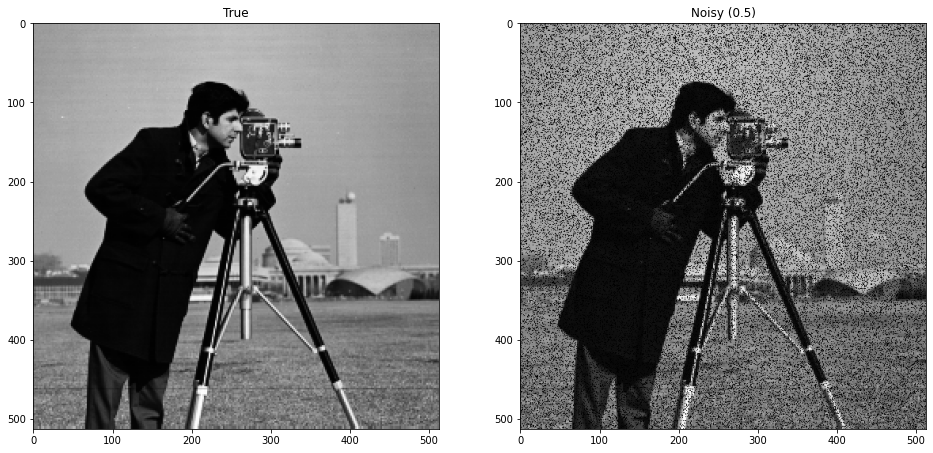

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[16,8])
axs[0].imshow(img, cmap='gray')
axs[0].set_title('True')
axs[1].imshow(img_noisy, cmap='gray')
axs[1].set_title('Noisy (0.5)')
plt.show()

**Recovering of image**

SVD noise level 0.1, rank 100, RMSE:0.321 and SSIM: 0.383
SVD noise level 0.2, rank 100, RMSE:0.354 and SSIM: 0.268
SVD noise level 0.4, rank 100, RMSE:0.411 and SSIM: 0.168
SVD noise level 0.5, rank 100, RMSE:0.434 and SSIM: 0.141
SVD noise level 0.7, rank 100, RMSE:0.474 and SSIM: 0.101


<Figure size 1440x720 with 0 Axes>

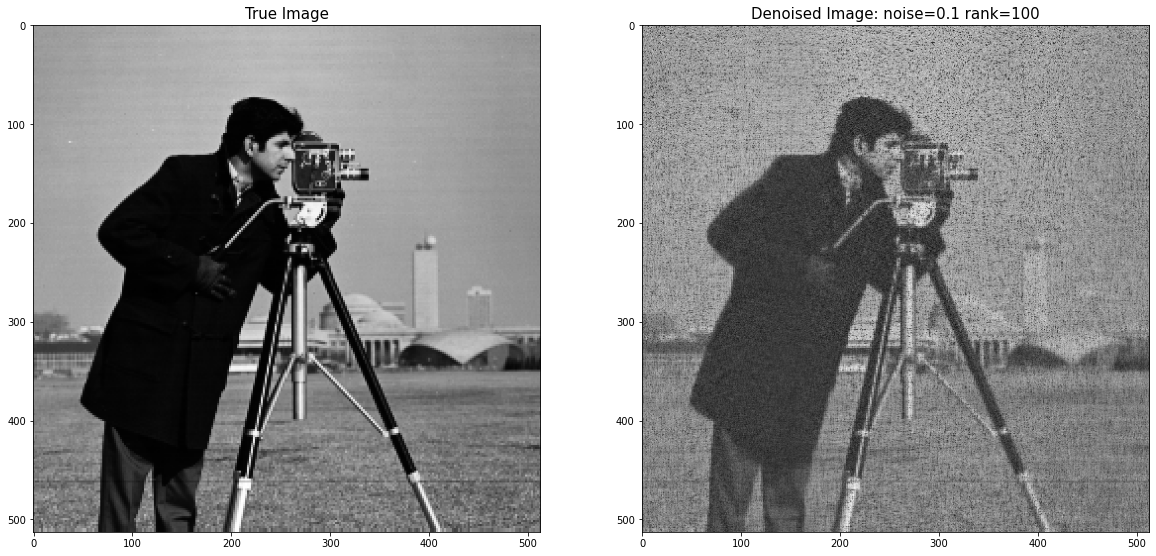

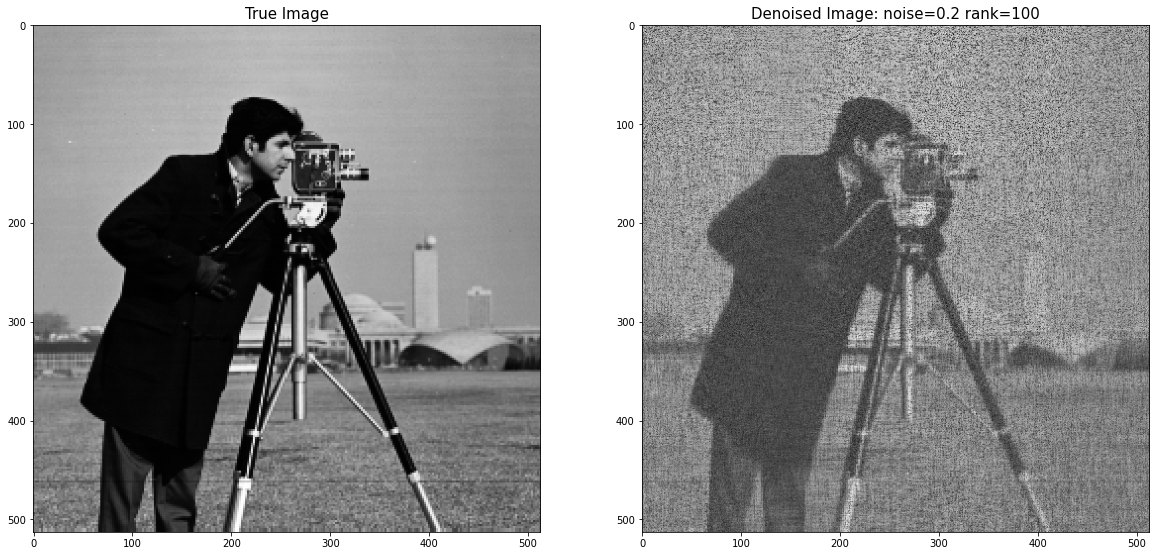

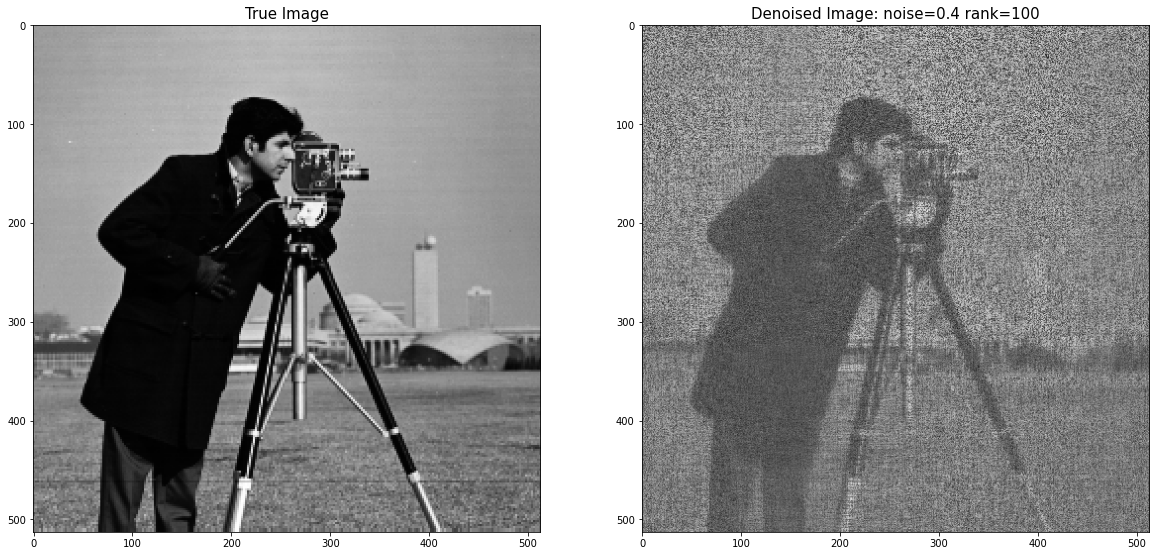

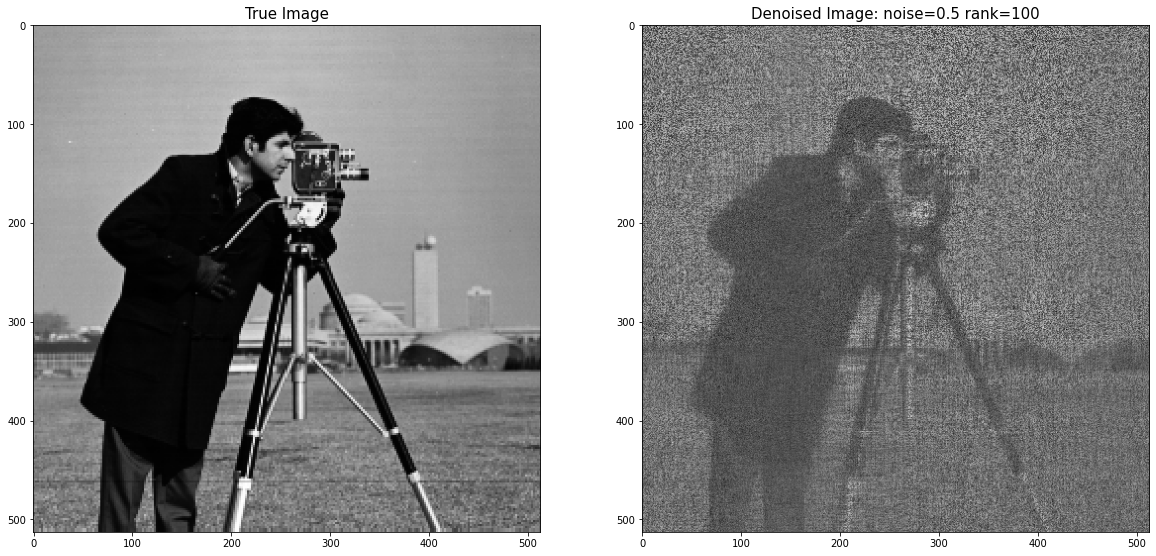

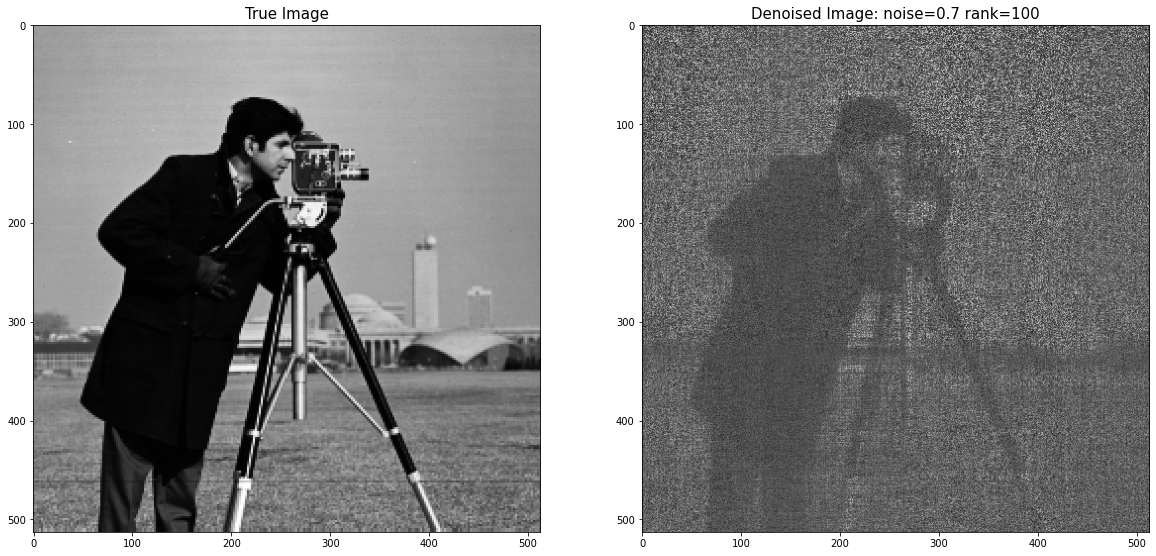

In [30]:
ranks = [10, 50, 100]
noise_level = [0.1, 0.2, 0.4, 0.5, 0.7]

simm = []

plt.figure(figsize=(20, 10))
for i, nl in enumerate(noise_level):
    mask = gen_mask(m, n, nl)
    img_noisy = img*mask
    simm_ = []
    for rank in ranks:
        u, s, vh = np.linalg.svd(img_noisy)
        s[rank:] = 0
    
        A_hat = np.dot(u*s, vh)
        simm_.append(ssim(img,A_hat))
        
        # Save denoised images
        if rank == 10:
            cv2.imwrite('results/svd/imgDenoised_' +str(nl)+'.jpg', cv2.convertScaleAbs(A_hat, alpha=(255.0)))

    
    simm.append(simm_)
    print("SVD noise level {}, rank {}, RMSE:{:.3f} and SSIM: {:.3f}".format(nl, rank, calc_unobserved_rmse(img, A_hat, mask), ssim(img,A_hat)))

    # Visualize results
    plot_proc(img, A_hat, 'Denoised Image: noise='+str(nl)+' rank='+str(rank))
    
plt.show()

**Rank comparison**

In [15]:
res = np.asarray(simm)

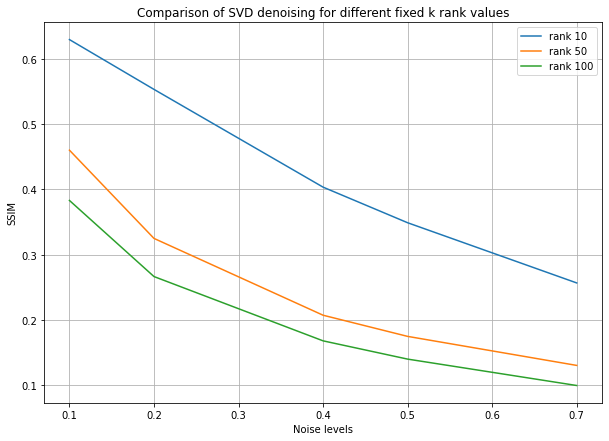

In [27]:
fig = plt.figure(figsize=[10,7])

plt.plot(noise_level, res.T[0], label='rank 10')
plt.plot(noise_level, res.T[1], label='rank 50')
plt.plot(noise_level, res.T[2], label='rank 100')
plt.xlabel('Noise levels')
plt.ylabel('SSIM')
plt.title('Comparison of SVD denoising for different fixed k rank values')
plt.legend()
plt.grid()
plt.show()